## 1、特征归一化
     进行[0, 1]规范化之后，可以让不同维度的特征数据，在同一标准下可以进行比较

### Min-max规范化
    
    新数值 = （原数值 - 最小值）/ 最大值 - 最小值

### Z-Score规范化

    新数值 = （原数值 - 均值）/ 标准差
    
    当前用得最多的数据标准化方式。

### 小数定标规范化

    通过移动小数点的位置来进行规范化

    比如A的取值范围 [-9999,666]A的新数值=原数值/10000


## 2、评测标准
    准确率，召回率，精确率，F值

![Image of Yaktocat](img/3.png)

    TODO：暂时未掌握Jupyter直接编辑公式语法的方式，暂时使用图片引入，之后修正

## 3、TF-IDF

    TF：Term Frequency，词频 TF = 单词次数/文档中总单词数量
    
    一个单词的重要性和它在文档中出现的次数呈正比。
    
    IDF：Inverse Document Frequency，逆向文档频率

    一个单词在文档中的区分度。这个单词出现的文档数越少，区分度越大，IDF越大
    
    IDF = log（文档总数/单词出现的文档数 + 1）


## 4、Python中如何进行数据清洗


#### 问题2：缺失值
    在数据中有些年龄、体重数值是缺失的，这往往是因为数据量较大，在过程中，有些数值没有采集到。通常我们可以采用以下三种方法：
    删除：删除数据缺失的记录；
    均值：使用当前列的均值；
    高频：使用当前列出现频率最高的数据。
    比如我们想对df['Age']中缺失的数值用平均年龄进行填充，可以这样写：
    df['Age'].fillna(df['Age'].mean(), inplace=True)


#### 问题2：空行
    
    我们发现数据中有一个空行，除了 index 之外，全部的值都是 NaN。Pandas 的 read_csv() 并没有可选参数来忽略空行，这样，我们就需要在数据被读入之后再使用 dropna() 进行处理，删除空行。
    
    # 删除全空的行
    
    df.dropna(how='all',inplace=True) 

#### 问题3：列数据的单位不统一
    
    weight列的数值，有的单位是千克（kgs），有的单位是磅（lbs）。
    
    这里统一将磅（lbs）转化为千克（kgs）：
    
    # 获取 weight 数据列中单位为 lbs 的数据
    rows_with_lbs = df['weight'].str.contains('lbs').fillna(False)
    
    # 将 lbs转换为 kgs, 2.2lbs=1kgs
    for i,lbs_row in df[rows_with_lbs].iterrows():
    
        # 截取从头开始到倒数第三个字符之前，即去掉lbs。
        weight = int(float(lbs_row['weight'][:-3])/2.2)
        df.at[i,'weight'] = '{}kgs'.format(weight) 


#### 问题4：非ASCII字符
    
    如果文本中存在非 ASCII 的字符。我们还需要进行删除或者替换。
    
    这里使用对非ASCII字符进行删除方式
   
    # 删除非 ASCII 字符
    df['name'].replace({r'[^\x00-\x7F]+':''}, regex=True, inplace=True)


#### 问题5：一列有多个参数（可选）
    可以将Name分成last name + first name
    
    也可以进行保留。
    
    # 切分名字，删除源数据列
    df[['first_name','last_name']] = df['name'].str.split(expand=True)
    df.drop('name', axis=1, inplace=True)
    默认采用的空格进行分割，相当于df['name'].str.split(' ', expand=True)


['Age', 'Embarked=C', 'Embarked=Q', 'Embarked=S', 'Fare', 'Parch', 'Pclass', 'Sex=female', 'Sex=male', 'SibSp']
[ -1.7062013   33.88975295  32.3346551   14.69223597   0.10078942
  -4.21976038 -47.2594461  100.         -19.08335597 -14.10678045]


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


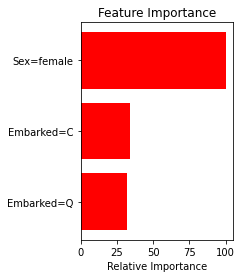

In [23]:
# Project：对Titanic数据进行数据清洗

import numpy as np
import pandas as pd
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

def show_feature_importance(feature_list, feature_importance):
    # 设定阈值
    fi_threshold = 20
    # 重要特征的下标
    important_idx = np.where(feature_importance > fi_threshold)[0]
    # 特征名称
    important_features = [feature_list[i] for i in important_idx]
    # 重要特征
    sorted_idx = np.argsort(feature_importance[important_idx])[::-1]
    # 可视化
    pos = np.arange(sorted_idx.shape[0]) + 0.5
    plt.subplot(1, 2, 2)
    plt.title('Feature Importance')
    plt.barh(pos, feature_importance[important_idx][sorted_idx[::-1]], color='r',align='center')
    plt.yticks(pos, [important_features[i] for i in sorted_idx[::-1]])
    plt.xlabel('Relative Importance')
    plt.draw()
    plt.show()
    
# 数据加载
train_data = pd.read_csv("data/titanic/train.csv")
test_data = pd.read_csv("data/titanic/test.csv")
# print(train_data.info()) 
# print(train_data.describe())
# print(train_data.describe(include=['O']))# 查看离散数据类型的分布
# print(test_data['Embarked'].value_counts()) 可以使用高频填充
# print(train_data['Cabin'])

# 填充缺失值
train_data['Age'].fillna(train_data['Age'].mean(), inplace=True) # 使用平均年龄来填充年龄中的nan值
test_data['Age'].fillna(test_data['Age'].mean(),inplace=True) # 使用平均年龄来填充年龄中的nan值
train_data['Fare'].fillna(train_data['Fare'].mean(), inplace=True) # 使用票价的均值填充票价中的nan值
test_data['Fare'].fillna(test_data['Fare'].mean(),inplace=True) # 使用票价的均值填充票价中的nan值
# print(train_data['Embarked'].value_counts())
train_data['Embarked'].fillna('S', inplace=True) # 使用登录最多的港口来填充登录港口的nan值
test_data['Embarked'].fillna('S',inplace=True) # 使用登录最多的港口来填充登录港口的nan值

# 特征选择
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
train_features = train_data[features]
train_labels = train_data['Survived']
test_features = test_data[features]

# 特征转化 DictVectorizer将非数字化（符号化）的但具有一定结构的特征数据，转成数字0/1表示
dvec=DictVectorizer(sparse=False)
train_features=dvec.fit_transform(train_features.to_dict(orient='record'))
print(dvec.feature_names_)

# 使用LR分类器
clf = LogisticRegression(max_iter=100, verbose=True, random_state=33, tol=1e-4)
clf.fit(train_features, train_labels)

# 获取特征重要性（更容易幸存的特征）
feature_importance = clf.coef_[0]
feature_importance = 100.0 * (feature_importance / feature_importance.max())
print(feature_importance)
show_feature_importance(dvec.feature_names_, feature_importance)



### Project：对Steam-200K 数据进行数据清洗

In [48]:
# Project：对Steam-200K 数据进行数据清洗
import pandas as pd 

df = pd.read_csv('data/steam-200k.csv', header=None, names=["UserID","Game","Action","Hours","NoNeed"])
# 数据探索
print('显示前5条数据')
print(df.head())
print('显示数据大小')
print(df.shape)
# 创建Hours_Played字段，替代原有的Action和Hours，0表示仅购买，大于0表示购买且游戏时长
df['Hours_Played'] = df['Hours'].astype('float32')
# 如果字段Action=purchase，并且Hours=1.0，将设置Hours_Played=0
df.loc[(df['Action'] == 'purchase') & (df['Hours'] == 1.0), 'Hours'] = 0
print('增加了Hours_Played字段后，数据大小')
print(df.shape)

# 对数据从小到大进行排序, df下标也会发生变化
df.UserID = df.UserID.astype('int')
df = df.sort_values(['UserID', 'Game', 'Hours_Played'], ascending=True)

# 删除重复项，并保留最后一项出现的项（因为最后一项是用户游戏时间，第一项为购买）
clean_df = df.drop_duplicates(['UserID', 'Game'], keep = 'last')

# 去掉不用的列：Action, Hours, Not Needed
clean_df = clean_df.drop(['Action', 'Hours', 'NoNeed'], axis = 1)
print('删除重复项后的数据集：')
print(clean_df.shape)
print(clean_df.head(5))

# 探索下数据集的特征
n_users = len(clean_df.UserID.unique())
n_games = len(clean_df.Game.unique())
print('数据集中包含了 {0} 玩家，{1} 游戏'.format(n_users, n_games))

# 矩阵的稀疏性
sparsity = clean_df.shape[0] / float(n_users * n_games)
print('用户行为矩阵的稀疏性（填充比例）为{:.2%} '.format(sparsity))


显示前5条数据
      UserID                        Game    Action  Hours  NoNeed
0  151603712  The Elder Scrolls V Skyrim  purchase    1.0       0
1  151603712  The Elder Scrolls V Skyrim      play  273.0       0
2  151603712                   Fallout 4  purchase    1.0       0
3  151603712                   Fallout 4      play   87.0       0
4  151603712                       Spore  purchase    1.0       0
显示数据大小
(200000, 5)
增加了Hours_Played字段后，数据大小
(200000, 6)
删除重复项后的数据集：
(128804, 3)
       UserID                   Game  Hours_Played
65430    5250            Alien Swarm           4.9
65424    5250        Cities Skylines         144.0
65435    5250         Counter-Strike           1.0
65436    5250  Counter-Strike Source           1.0
65437    5250          Day of Defeat           1.0
数据集中包含了 12393 玩家，5155 游戏
用户行为矩阵的稀疏性（填充比例）为0.20% 
